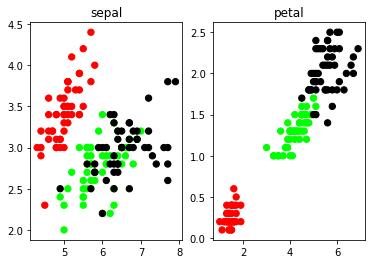

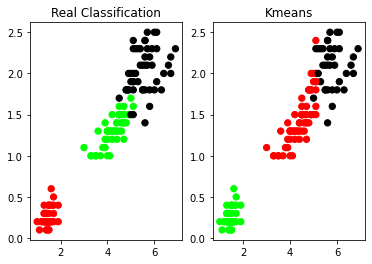


Predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Accuracy  0.8933333333333333
Confusion Matrix  [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


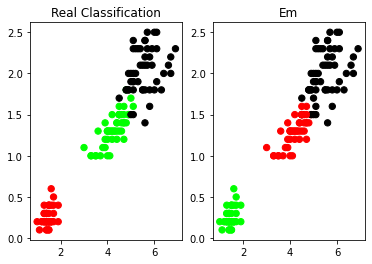


Predicted: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Accuracy  0.9666666666666667
Confusion Matrix  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans 
import sklearn.metrics as sm
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture 
l1 = [0,1,2]

def rename(s): 
    l2 = []
    for i in s:
        if i not in l2: 
            l2.append(i)
    for i in range(len(s)): 
        pos = l2.index(s[i])
        s[i] = l1[pos]
    return s

iris = datasets.load_iris()
X=pd.DataFrame(iris.data,columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] ) 
y = pd.DataFrame(iris.target,columns = ['Targets'])

def graph_plot(l,title,s,target): 
    plt.subplot(l[0],l[1],l[2]) 
    if s==1:
        plt.scatter(X.Sepal_Length,X.Sepal_Width, c=colormap[target], s=40)
    else:
        plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[target], s=40)
    plt.title(title)
plt.figure()
colormap = np.array(['red', 'lime', 'black'])
graph_plot([1, 2, 1],'sepal',1,y.Targets)
graph_plot([1, 2, 2],'petal',0,y.Targets) 
plt.show()

def fit_model(modelName):
    model = modelName(3) 
    model.fit(X)
    plt.figure()
    colormap = np.array(['red', 'lime', 'black']) 
    graph_plot([1, 2, 1],'Real Classification',0,y.Targets)
    if modelName == KMeans:
        m = 'Kmeans'
    else:
        m = 'Em'
    y1 = model.predict(X) 
    graph_plot([1, 2, 2],m,0,y1) 
    plt.show()
    km = rename(y1)
    print("\nPredicted: \n", km)
    print("Accuracy ",sm.accuracy_score(y, km)) 
    print("Confusion Matrix ",sm.confusion_matrix(y, km))
    
fit_model(KMeans) 
fit_model(GaussianMixture)